In [41]:
import os   # handling the files
import pickle # storing numpy features
import numpy as np
from tqdm.notebook import tqdm # how much data is process till now

from tensorflow.keras.applications.vgg16 import VGG16 , preprocess_input # extract features from image data.
from tensorflow.keras.preprocessing.image import load_img , img_to_array
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.layers import Input , Dense , LSTM , Embedding , Dropout , add

In [2]:
model = VGG16()

# restructure model
model = Model(inputs = model.inputs , outputs = model.layers[-2].output)

# Summerize
print(model.summary())

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 134,260,544 (512.16 MB)

 Trainable params: 134,260,544 (512.16 MB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
import os
import numpy as np  # Assuming you're using numpy for feature storage
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.vgg16 import preprocess_input  # Adjust as necessary
# from your_model_library import model  # Import your model here

# Set the base directory to the current working directory
BASE_DIR = os.getcwd()

# Set your images directory
directory = os.path.join(BASE_DIR, 'Images')

features = {}
img_names = os.listdir(directory)


In [ ]:

# Process each image in the directory
for i, img_name in enumerate(img_names):
    print(f"Processing {i + 1}/{len(img_names)}: {img_name}")
    
    # Construct the full image path
    img_path = os.path.join(directory, img_name)
    
    try:
        # Load the image from file
        image = load_img(img_path, target_size=(224, 224))
        
        # Convert image pixels to numpy array
        image = img_to_array(image)
        
        # Reshape data for model
        image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
        
        # Preprocess image for VGG
        image = preprocess_input(image)
        
        # Extract features
        feature = model.predict(image, verbose=0)
        
        # Get image ID
        image_id = img_name.split('.')[0]
        
        # Store feature
        features[image_id] = feature
    
    except Exception as e:
        print(f"Error processing {img_name}: {e}")


In [ ]:
# store features in pickle
pickle.dump(features, open(os.path.join(BASE_DIR, 'features.pkl'), 'wb'))

In [5]:
# load features from pickle
with open(os.path.join(BASE_DIR, 'features.pkl'), 'rb') as f:
    features = pickle.load(f)

In [6]:
features

{'COCO_train2014_000000000009': array([[0.       , 0.       , 0.       , ..., 1.1333965, 0.       ,
         0.       ]], dtype=float32),
 'COCO_train2014_000000000061': array([[3.2185326, 0.       , 0.       , ..., 0.       , 0.       ,
         0.       ]], dtype=float32),
 'COCO_train2014_000000000064': array([[2.9027286 , 3.430631  , 0.8342798 , ..., 2.2880101 , 0.9043574 ,
         0.43031955]], dtype=float32),
 'COCO_train2014_000000000086': array([[0.11792797, 0.        , 0.        , ..., 0.        , 1.6015141 ,
         0.6289791 ]], dtype=float32),
 'COCO_train2014_000000000094': array([[0.       , 0.       , 0.       , ..., 0.       , 2.4441588,
         0.       ]], dtype=float32),
 'COCO_train2014_000000000110': array([[0.4599059, 0.       , 0.       , ..., 0.       , 0.       ,
         0.       ]], dtype=float32),
 'COCO_train2014_000000000127': array([[0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 'COCO_train2014_000000000151': array([[2.4011264, 0.       , 0.       , 

# Preprocess JSON Captions Data

In [9]:
import json
from tqdm import tqdm

# Load JSON data
with open('captions.json', 'r') as f:
    captions_data = json.load(f)

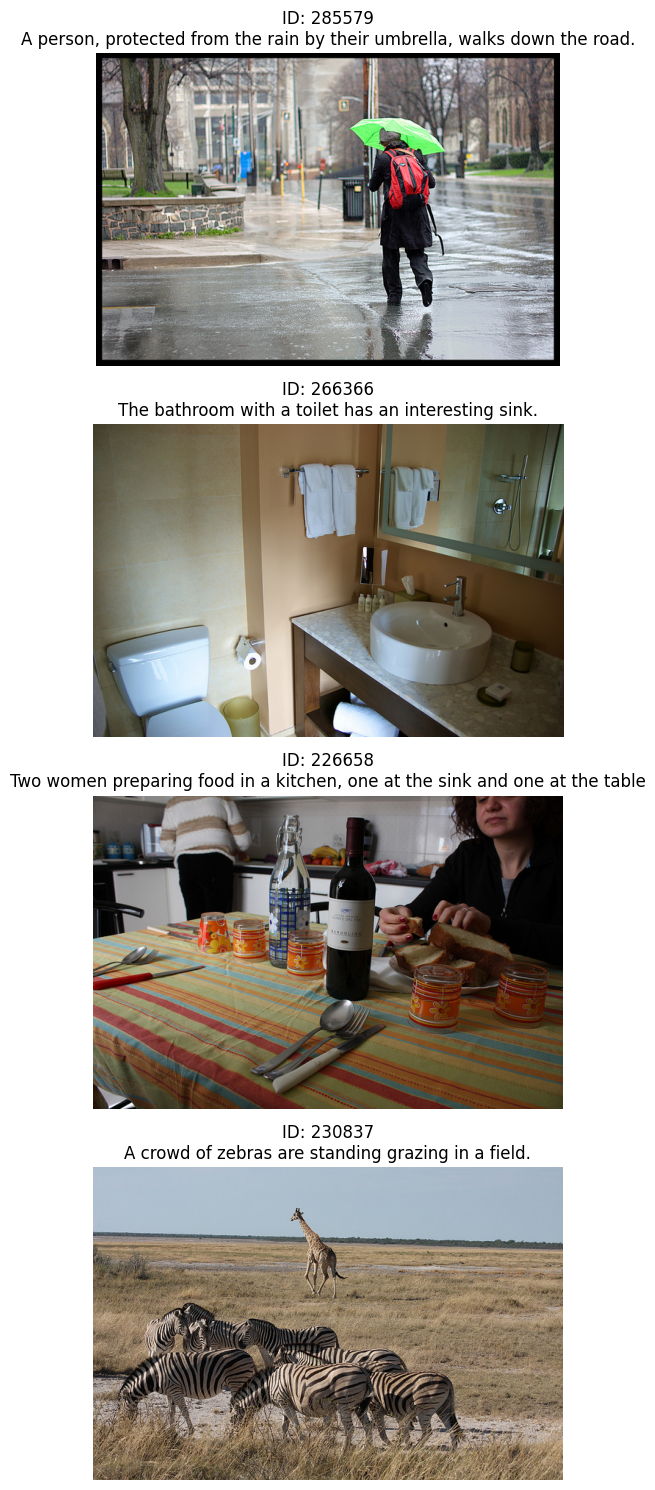

In [10]:
# Step 5: Visualize Sample Images with Captions
import matplotlib.pyplot as plt
from PIL import Image

# Define the directory containing your images
image_directory = './Images'

# Specify the image IDs you want to display (replace with valid IDs from your dataset)
image_ids_to_display = [285579, 266366, 226658, 230837]  # Example IDs

# Set up the figure and axes for display
fig, axes = plt.subplots(nrows=len(image_ids_to_display), ncols=1, figsize=(10, 15))

# Loop through the specified image IDs and display the corresponding images
for ax, image_id in zip(axes, image_ids_to_display):
    # Find the corresponding caption
    caption = next((item['caption'] for item in captions_data if item['image_id'] == image_id), "Caption not found")

    # Construct the image filename according to the specified format
    image_filename = f"COCO_train2014_{image_id:012d}.jpg"
    image_path = os.path.join(image_directory, image_filename)

    # Load and display the image
    try:
        img = Image.open(image_path)
        ax.imshow(img)
        ax.set_title(f"ID: {image_id}\n{caption}", fontsize=12)
        ax.axis('off')  # Hide axes
    except FileNotFoundError:
        ax.set_title(f"ID: {image_id}\nImage not found", fontsize=12)
        ax.axis('off')  # Hide axes

plt.tight_layout()
plt.show()

In [11]:
def normalize_image_id(image_id):
    """
    Normalize image IDs to ensure consistent format
    """
    # If ID doesn't start with COCO_train2014_, add it
    if not image_id.startswith('COCO_train2014_'):
        # Pad the ID with leading zeros to match the format
        padded_id = str(image_id).zfill(12)
        return f'COCO_train2014_{padded_id}'
    return image_id

In [12]:
def analyze_id_formats(mapping, features):
    """
    Analyze and print information about ID formats in mapping and features
    """
    print("\nID Format Analysis:")
    print("-" * 50)
    
    # Sample from features
    feature_ids = list(features.keys())[:5]
    print("\nSample feature IDs:")
    for id_sample in feature_ids:
        print(f"- {id_sample}")
    
    # Sample from mapping
    mapping_ids = list(mapping.keys())[:5]
    print("\nSample mapping IDs:")
    for id_sample in mapping_ids:
        print(f"- {id_sample}")
    
    # Check for mismatches
    normalized_mapping = {}
    id_conversions = {}
    
    for orig_id in mapping.keys():
        normalized_id = normalize_image_id(orig_id)
        if normalized_id != orig_id:
            id_conversions[orig_id] = normalized_id
        normalized_mapping[normalized_id] = mapping[orig_id]
    
    print("\nID format statistics:")
    print(f"Total features: {len(features)}")
    print(f"Total mappings before normalization: {len(mapping)}")
    print(f"Total mappings after normalization: {len(normalized_mapping)}")
    print(f"Number of IDs requiring normalization: {len(id_conversions)}")
    
    return normalized_mapping

# Map Caption with Image

In [13]:
mapping = {}
for entry in tqdm(captions_data):
    image_id = normalize_image_id(str(entry['image_id']))  # Normalize the ID here
    caption = entry['caption']
    if image_id not in mapping:
        mapping[image_id] = []
    mapping[image_id].append(caption)

100%|██████████| 93950/93950 [00:00<00:00, 982994.22it/s]


In [14]:
len(mapping)
mapping


{'COCO_train2014_000000299675': ['A white square kitchen with tile floor that needs repairs ',
  'A white kitchen in a home with the light on.',
  'A kitchen with a tile floor has cabinets with no doors, a dishwasher, a sink, and a refrigerator.',
  'A white kitchen without doors on the cabinets.',
  'A white kitchen filled with pots, pans and dishes.'],
 'COCO_train2014_000000513461': ['A surfer, a woman, and a child walk on the beach.',
  'A person holding a surf board on a beach. ',
  'A family standing next to the ocean on a sandy beach with a surf board.',
  'A man getting ready to surf as lookers walk by',
  'A family carrying a surfboard to the ocean.'],
 'COCO_train2014_000000018691': ['A few people sit on a dim transportation system. ',
  'six people on a bus at night time',
  'random people sitting in a public tranport bus.',
  'There are only a few people in the bus.',
  'A group of people are riding the bus.'],
 'COCO_train2014_000000285579': ['A person, protected from the 

In [15]:
# Function to clean captions
import re
def clean(mapping):
    for key, captions in mapping.items():
        for i in range(len(captions)):
            caption = captions[i]
            # Convert to lowercase
            caption = caption.lower()
            # Remove non-alphabet characters
            caption = re.sub(r'[^a-z\s]', '', caption)
            # Remove additional spaces
            caption = re.sub(r'\s+', ' ', caption).strip()
            # Add start and end tags to the caption
            caption = 'startseq ' + " ".join([word for word in caption.split() if len(word) > 1]) + ' endseq'
            captions[i] = caption

In [16]:
# before preprocess of text
mapping['COCO_train2014_000000299675']

['A white square kitchen with tile floor that needs repairs ',
 'A white kitchen in a home with the light on.',
 'A kitchen with a tile floor has cabinets with no doors, a dishwasher, a sink, and a refrigerator.',
 'A white kitchen without doors on the cabinets.',
 'A white kitchen filled with pots, pans and dishes.']

In [17]:
clean(mapping)


In [18]:
mapping['COCO_train2014_000000299675']


['startseq white square kitchen with tile floor that needs repairs endseq',
 'startseq white kitchen in home with the light on endseq',
 'startseq kitchen with tile floor has cabinets with no doors dishwasher sink and refrigerator endseq',
 'startseq white kitchen without doors on the cabinets endseq',
 'startseq white kitchen filled with pots pans and dishes endseq']

In [19]:
all_captions = []
for key in mapping:
    for caption in mapping[key]:
        all_captions.append(caption)

In [20]:
len(all_captions)

93950

In [21]:
all_captions[:10]


['startseq white square kitchen with tile floor that needs repairs endseq',
 'startseq white kitchen in home with the light on endseq',
 'startseq kitchen with tile floor has cabinets with no doors dishwasher sink and refrigerator endseq',
 'startseq white kitchen without doors on the cabinets endseq',
 'startseq white kitchen filled with pots pans and dishes endseq',
 'startseq surfer woman and child walk on the beach endseq',
 'startseq person holding surf board on beach endseq',
 'startseq family standing next to the ocean on sandy beach with surf board endseq',
 'startseq man getting ready to surf as lookers walk by endseq',
 'startseq family carrying surfboard to the ocean endseq']

In [22]:
# tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(all_captions)
vocab_size = len(tokenizer.word_index) + 1

In [23]:
vocab_size


12819

In [24]:
# get maximum length of the caption available
max_length = max(len(caption.split()) for caption in all_captions)
max_length

46

# Train Test Split the Data

In [25]:
image_ids = list(mapping.keys())
split = int(len(image_ids) * 0.90)
train = image_ids[:split]
test = image_ids[split:]

In [27]:
import numpy as np
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

def update_data_generator(data_keys, mapping, features, tokenizer, max_length, vocab_size, batch_size):
    """
    Updated data generator with improved error handling and batch management
    """
    # Pre-filter valid keys to avoid repeated checks
    valid_keys = [key for key in data_keys if key in features and key in mapping]
    print(f"Valid training samples: {len(valid_keys)} out of {len(data_keys)}")
    
    if not valid_keys:
        raise ValueError("No valid training samples found!")
        
    while True:
        # Shuffle the keys for each epoch
        np.random.shuffle(valid_keys)
        
        X1, X2, y = [], [], []
        for key in valid_keys:
            try:
                # Get image features
                image_feature = features[key][0]
                
                # Get captions for this image
                captions = mapping[key]
                
                for caption in captions:
                    # Convert caption to sequence
                    seq = tokenizer.texts_to_sequences([caption])[0]
                    
                    # Create input-output pairs
                    for i in range(1, len(seq)):
                        # Get input and output sequences
                        in_seq = seq[:i]
                        out_seq = seq[i]
                        
                        # Pad input sequence
                        in_seq = pad_sequences([in_seq], maxlen=max_length)[0]
                        
                        # One-hot encode output sequence
                        out_seq = to_categorical([out_seq], num_classes=vocab_size)[0]
                        
                        # Add to batch
                        X1.append(image_feature)
                        X2.append(in_seq)
                        y.append(out_seq)
                        
                        # Yield batch when it reaches the desired size
                        if len(X1) == batch_size:
                            yield [np.array(X1), np.array(X2)], np.array(y)
                            X1, X2, y = [], [], []
                            
            except Exception as e:
                print(f"Error processing key {key}: {str(e)}")
                continue
        
        # Yield any remaining samples
        if X1:
            yield [np.array(X1), np.array(X2)], np.array(y)

# Creating The Model

In [28]:
# encoder model
# image feature layers
inputs1 = Input(shape=(4096,))
fe1 = Dropout(0.4)(inputs1)
fe2 = Dense(256, activation='relu')(fe1)
# sequence feature layers
inputs2 = Input(shape=(max_length,))
se1 = Embedding(vocab_size, 256, mask_zero=True)(inputs2)
se2 = Dropout(0.4)(se1)
se3 = LSTM(256)(se2)

# decoder model
decoder1 = add([fe2, se3])
decoder2 = Dense(256, activation='relu')(decoder1)
outputs = Dense(vocab_size, activation='softmax')(decoder2)

model = Model(inputs=[inputs1, inputs2], outputs=outputs)
model.compile(loss='categorical_crossentropy', optimizer='adam')

# plot the model
model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 46)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_1       │ (None, 4096)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 46, 256)   │  3,281,664 │ input_layer_2[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 4096)      │          0 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 46, 256)   │          0 │ embedding[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ not_equal           │ (None, 46)        │          0 │ input_layer_2[0]… │
│ (NotEqual)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 256)       │  1,048,832 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm (LSTM)         │ (None, 256)       │    525,312 │ dropout_1[0][0],  │
│                     │                   │            │ not_equal[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 256)       │          0 │ dense[0][0],      │
│                     │                   │            │ lstm[0][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 256)       │     65,792 │ add[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 12819)     │  3,294,483 │ dense_1[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 8,216,083 (31.34 MB)

 Trainable params: 8,216,083 (31.34 MB)

 Non-trainable params: 0 (0.00 B)

# Model Training 


In [29]:
def data_generator(data_keys, mapping, features, tokenizer, max_length, vocab_size, batch_size):
    while True:
        X1, X2, y = list(), list(), list()
        for key in data_keys:
            # Get captions for the current image ID
            captions = mapping[key]
            # Process each caption
            for caption in captions:
                # Encode the caption sequence
                seq = tokenizer.texts_to_sequences([caption])[0]
                # Split the sequence into X, y pairs
                for i in range(1, len(seq)):
                    # Split into input and output pairs
                    in_seq, out_seq = seq[:i], seq[i]
                    # Pad input sequence
                    in_seq = pad_sequences([in_seq], maxlen=max_length)[0]
                    # Encode output sequence
                    out_seq = to_categorical([out_seq], num_classes=vocab_size)[0]
                    # Store the sequences, ensure features[key] exists
                    if key in features:
                        X1.append(features[key][0])  # Access feature vector
                    else:
                        print(f"Warning: Missing features for image ID {key}")
                        continue  # Skip if features are missing
                    X2.append(in_seq)
                    y.append(out_seq)

            # Yield data in batches
            if len(X1) == batch_size:
                yield [np.array(X1), np.array(X2)], np.array(y)
                X1, X2, y = list(), list(), list()

In [30]:
import tensorflow as tf

In [31]:

def create_tf_dataset(data_keys, mapping, features, tokenizer, max_length, vocab_size, batch_size):
    """
    Creates a TensorFlow dataset for training
    """
    def generator():
        # Pre-filter valid keys
        valid_keys = [key for key in data_keys if key in features and key in mapping]
        np.random.shuffle(valid_keys)
        
        for key in valid_keys:
            try:
                image_feature = features[key][0]
                captions = mapping[key]
                
                for caption in captions:
                    seq = tokenizer.texts_to_sequences([caption])[0]
                    
                    for i in range(1, len(seq)):
                        in_seq = seq[:i]
                        out_seq = seq[i]
                        
                        # Pad sequence
                        in_seq = pad_sequences([in_seq], maxlen=max_length)[0]
                        
                        # One-hot encode output
                        out_seq = to_categorical([out_seq], num_classes=vocab_size)[0]
                        
                        yield (image_feature, in_seq), out_seq
                        
            except Exception as e:
                print(f"Error processing key {key}: {str(e)}")
                continue

    # Define output shapes and types
    output_signature = (
        (
            tf.TensorSpec(shape=(4096,), dtype=tf.float32),  # image features
            tf.TensorSpec(shape=(max_length,), dtype=tf.int32)  # input sequence
        ),
        tf.TensorSpec(shape=(vocab_size,), dtype=tf.float32)  # output sequence
    )
    
    # Create the dataset
    dataset = tf.data.Dataset.from_generator(
        generator,
        output_signature=output_signature
    )
    
    # Batch and prefetch
    dataset = dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE)
    
    return dataset


In [32]:

def train_model(model, train, mapping, features, tokenizer, max_length, vocab_size, 
                batch_size=32, epochs=20, verbose=1):
    """
    Training function using TensorFlow dataset
    """
    # Calculate valid samples
    valid_samples = sum(1 for key in train if key in features and key in mapping)
    steps = valid_samples // batch_size
    
    print(f"Training Configuration:")
    print(f"- Total valid samples: {valid_samples}")
    print(f"- Batch size: {batch_size}")
    print(f"- Steps per epoch: {steps}")
    print(f"- Total epochs: {epochs}")
    
    # Create dataset
    dataset = create_tf_dataset(
        train, mapping, features, tokenizer, 
        max_length, vocab_size, batch_size
    )
    
    # Training loop
    history = model.fit(
        dataset,
        steps_per_epoch=steps,
        epochs=epochs,
        verbose=verbose
    )
    
    return history.history['loss']

In [56]:
# Configure training parameters
batch_size = 64
epochs = 60

# Train the model
history = train_model(
    model=model,
    train=train,
    mapping=mapping,
    features=features,
    tokenizer=tokenizer,
    max_length=max_length,
    vocab_size=vocab_size,
    batch_size=batch_size,
    epochs=epochs
)

# Print final training summary
print("\nTraining completed!")
print(f"Final loss: {history[-1]:.4f}")

Training Configuration:
- Total valid samples: 16904
- Batch size: 64
- Steps per epoch: 264
- Total epochs: 60
Epoch 1/60
264/264 ━━━━━━━━━━━━━━━━━━━━ 61s 223ms/step - loss: 3.8751
Epoch 2/60
264/264 ━━━━━━━━━━━━━━━━━━━━ 60s 229ms/step - loss: 4.0249
Epoch 3/60
264/264 ━━━━━━━━━━━━━━━━━━━━ 58s 220ms/step - loss: 3.9514
Epoch 4/60
264/264 ━━━━━━━━━━━━━━━━━━━━ 59s 223ms/step - loss: 3.9899
Epoch 5/60
264/264 ━━━━━━━━━━━━━━━━━━━━ 59s 222ms/step - loss: 4.0218
Epoch 6/60
264/264 ━━━━━━━━━━━━━━━━━━━━ 58s 221ms/step - loss: 3.9633
Epoch 7/60
264/264 ━━━━━━━━━━━━━━━━━━━━ 58s 220ms/step - loss: 3.9991
Epoch 8/60
264/264 ━━━━━━━━━━━━━━━━━━━━ 59s 223ms/step - loss: 4.0106
Epoch 9/60
264/264 ━━━━━━━━━━━━━━━━━━━━ 58s 221ms/step - loss: 3.8841
Epoch 10/60
264/264 ━━━━━━━━━━━━━━━━━━━━ 58s 219ms/step - loss: 3.9311
Epoch 11/60
264/264 ━━━━━━━━━━━━━━━━━━━━ 58s 219ms/step - loss: 3.8197
Epoch 12/60
264/264 ━━━━━━━━━━━━━━━━━━━━ 57s 217ms/step - loss: 3.9696
Epoch 13/60
264/264 ━━━━━━━━━━━━━━━━━━━━ 59s 

C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.2032.0_x64__qbz5n2kfra8p0\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


264/264 ━━━━━━━━━━━━━━━━━━━━ 57s 215ms/step - loss: 3.7282
Epoch 51/60
264/264 ━━━━━━━━━━━━━━━━━━━━ 56s 213ms/step - loss: 3.7458
Epoch 52/60
264/264 ━━━━━━━━━━━━━━━━━━━━ 57s 215ms/step - loss: 3.6834
Epoch 53/60
264/264 ━━━━━━━━━━━━━━━━━━━━ 56s 212ms/step - loss: 3.7896
Epoch 54/60
264/264 ━━━━━━━━━━━━━━━━━━━━ 57s 216ms/step - loss: 3.6461
Epoch 55/60
264/264 ━━━━━━━━━━━━━━━━━━━━ 56s 213ms/step - loss: 3.7986
Epoch 56/60
264/264 ━━━━━━━━━━━━━━━━━━━━ 57s 218ms/step - loss: 3.6913
Epoch 57/60
264/264 ━━━━━━━━━━━━━━━━━━━━ 56s 213ms/step - loss: 3.8125
Epoch 58/60
264/264 ━━━━━━━━━━━━━━━━━━━━ 57s 214ms/step - loss: 3.6969
Epoch 59/60
264/264 ━━━━━━━━━━━━━━━━━━━━ 57s 215ms/step - loss: 3.6657
Epoch 60/60
264/264 ━━━━━━━━━━━━━━━━━━━━ 57s 216ms/step - loss: 3.6497

Training completed!
Final loss: 3.6731


In [57]:
# save the model
model.save(BASE_DIR+'/best_model.keras')

In [58]:
from keras.saving import load_model

#Iff loading model is required
# Load the model
model = load_model(BASE_DIR + '/best_model.keras')


# Caption Generation


In [59]:
def idx_to_word(integer, tokenizer):
    for word, index in tokenizer.word_index.items():
        if index == integer:
            return word
    return None

In [63]:
# generate caption for an image
def predict_caption(model, image, tokenizer, max_length):
    # add start tag for generation process
    in_text = 'startseq'
    # iterate over the max length of sequence
    for i in range(max_length):
        # encode input sequence
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        # pad the sequence
        sequence = pad_sequences([sequence], max_length)
        # predict next word
        yhat = model.predict([image, sequence], verbose=0)
        # get index with high probability
        yhat = np.argmax(yhat)
        # convert index to word
        word = idx_to_word(yhat, tokenizer)
        # stop if word not found
        if word is None:
            break
        # append word as input for generating next word
        in_text += " " + word
        # stop if we reach end tag
        if word == 'endseq':
            break
    return in_text

# Evaluation of the model (BLEU Score)

In [65]:
from nltk.translate.bleu_score import corpus_bleu
# validate with test data
actual, predicted = list(), list()

for key in tqdm(test):
    # get actual caption
    captions = mapping[key]
    # predict the caption for image
    y_pred = predict_caption(model, features[key], tokenizer, max_length)
    # split into words
    actual_captions = [caption.split() for caption in captions]
    y_pred = y_pred.split()
    # append to the list
    actual.append(actual_captions)
    predicted.append(y_pred)
# calcuate BLEU score
print("BLEU-1: %f" % corpus_bleu(actual, predicted, weights=(1.0, 0, 0, 0)))
print("BLEU-2: %f" % corpus_bleu(actual, predicted, weights=(0.5, 0.5, 0, 0)))

100%|██████████| 1879/1879 [12:33<00:00,  2.49it/s]


BLEU-1: 0.424767
BLEU-2: 0.159171


# Visualisation

In [66]:
from PIL import Image
import matplotlib.pyplot as plt

def generate_caption(image_name):
    # Load the image
    image_id = image_name.split('.')[0]
    img_path = os.path.join(BASE_DIR, "Images", image_name)
    image = Image.open(img_path)
    captions = mapping[image_id]

    # Display actual captions without startseq/endseq
    print('---------------------Actual---------------------')
    for caption in captions:
        print(caption.replace('startseq ', '').replace(' endseq', ''))

    # Predict and display the caption without startseq/endseq
    y_pred = predict_caption(model, features[image_id], tokenizer, max_length)
    print('--------------------Predicted--------------------')
    print(y_pred.replace('startseq ', '').replace(' endseq', ''))

    # Show the image
    plt.imshow(image)
    plt.axis('off')
    plt.show()

---------------------Actual---------------------
three urinals are hanging from marble tile wall
view of three urinals next to each other
three modern white urinals line up against grey bathroom wall
three urinals are handing from the wall of the bathroom
three urinals hanging on the wall of public bathroom
--------------------Predicted--------------------
bathroom with toilet and toilet


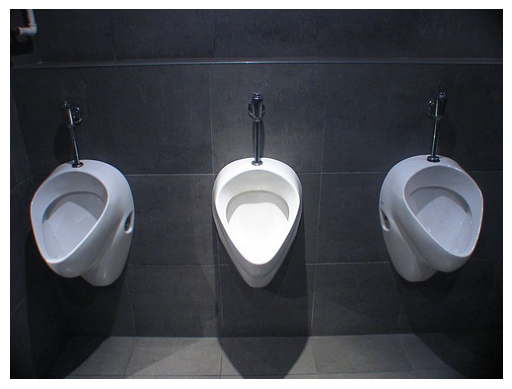

In [74]:
generate_caption("COCO_train2014_000000581766.jpg")

---------------------Actual---------------------
this area of road has concrete overpass and wild bushes along the guard rail
train passing an underpass near road
white train coming down the tracks near road
train on train track under bridge
dusty road with telephone poles and wires metal crash guard bridge and train on tracks
--------------------Predicted--------------------
train is parked on the tracks with people on the side of it


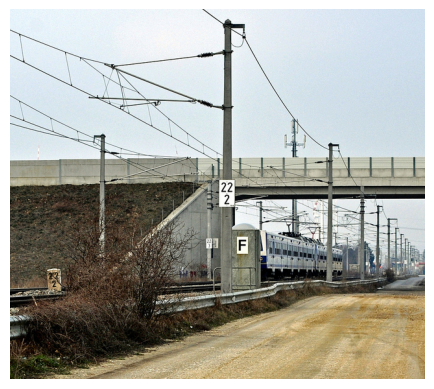

In [75]:
generate_caption("COCO_train2014_000000580166.jpg")


---------------------Actual---------------------
the bathroom light is on over the sink
an empty clean bathroom with cabinet sink and toilet
the bathroom cabinet is designed in colonial style
bathroom with sink toilet cabinet and window all white
bathroom with sink toilet window and cabinet with shelf
--------------------Predicted--------------------
bathroom with sink and sink


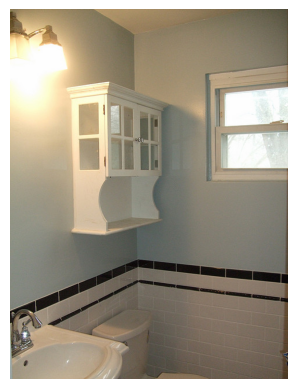

In [91]:
generate_caption("COCO_train2014_000000571357.jpg")


---------------------Actual---------------------
an airport with several planes at their gates
planes are parked on runway next to some buildings
an airport filled with jetliners on tarmacs next to hangars
row of commercial airplanes lined up by the airport
an airport runway with four parked commercial airliners
--------------------Predicted--------------------
an airplane is parked on the tarmac


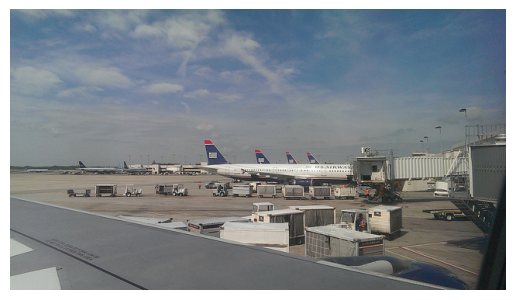

In [81]:
generate_caption("COCO_train2014_000000579461.jpg")

---------------------Actual---------------------
this area of road has concrete overpass and wild bushes along the guard rail
train passing an underpass near road
white train coming down the tracks near road
train on train track under bridge
dusty road with telephone poles and wires metal crash guard bridge and train on tracks
--------------------Predicted--------------------
train is parked on the tracks with people on the side of it


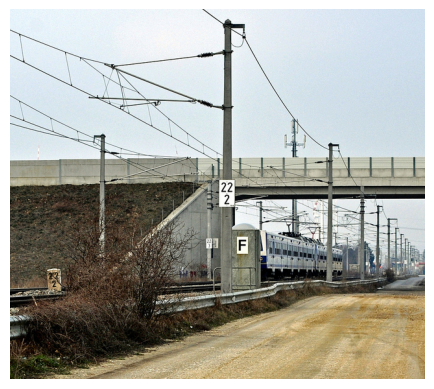

In [67]:
generate_caption("COCO_train2014_000000580166.jpg")

In [ ]:
# Evaluating Detailed Bleu Scores

In [69]:
from nltk.translate.bleu_score import corpus_bleu

# validate with test data
actual, predicted = list(), list()

for key in tqdm(test):
    # get actual caption
    captions = mapping[key]
    # predict the caption for image
    y_pred = predict_caption(model, features[key], tokenizer, max_length)
    # split into words
    actual_captions = [caption.split() for caption in captions]
    y_pred = y_pred.split()
    # append to the list
    actual.append(actual_captions)
    predicted.append(y_pred)

# Calculate BLEU scores
bleu_1 = corpus_bleu(actual, predicted, weights=(1.0, 0, 0, 0))
bleu_2 = corpus_bleu(actual, predicted, weights=(0.5, 0.5, 0, 0))
bleu_3 = corpus_bleu(actual, predicted, weights=(1/3, 1/3, 1/3, 0))
bleu_4 = corpus_bleu(actual, predicted, weights=(0.25, 0.25, 0.25, 0.25))

print("BLEU-1: %f" % bleu_1)
print("BLEU-2: %f" % bleu_2)
print("BLEU-3: %f" % bleu_3)
print("BLEU-4: %f" % bleu_4)



100%|██████████| 1879/1879 [28:48<00:00,  1.09it/s]


BLEU-1: 0.477092
BLEU-2: 0.200725
BLEU-3: 0.099103
BLEU-4: 0.048059
